# Assignment 02: Linear Discriminant Analysis (LDA)


## Setting up: Install required packages

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import seed
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
#from simple_colors import *
import time


## Generate sample

In [15]:
seed(23)
mu, sigma = 0, 0.1 # mean and standard deviation
x1 = np.random.normal(mu, sigma, 1000)
x1=x1.reshape(-1, 1)

In [16]:
seed(1)
y=np.random.randint(0,3,size=(1000,1))

In [17]:
y_cross=np.ravel(y)

## Data pre-processing

In [18]:
mms = MinMaxScaler()
normalized_data = pd.DataFrame(mms.fit_transform(x1))
#normalized_data.head

C:\Users\Jishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


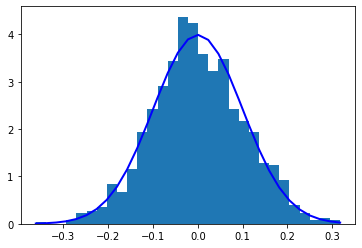

In [19]:
count, bins, ignored = plt.hist(x1, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='b')
plt.show()

# LDA using LinearDiscriminantAnalysis package of the Scikit-learn libray

## 5-fold cross-validation using cross_val_score package

In [20]:
start_time1 = time.time()
clf_s=LinearDiscriminantAnalysis()
print('5-fold cross-validation accuracy score:', np.mean(cross_val_score(clf_s,x1, np.ravel(y), cv=5,scoring='accuracy')))
print('5-fold cross-validation F1 score:', np.mean(cross_val_score(clf_s, x1, np.ravel(y), cv=5,scoring='f1_micro')))
end_time1 = time.time()
print ("Computational time in seconds = " +str(end_time1 - start_time1) )

5-fold cross-validation accuracy score: 0.3459767994199855
5-fold cross-validation F1 score: 0.3459767994199855
Computational time in seconds = 0.16036725044250488


## 5-fold old cross validation implemenation from scratch

In [21]:
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

In [22]:
for trainIndex, textIndex in kf.split(x1,y):
    start_time2 = time.time()
    I_a=[]
    I_f1=[]
    I_t=[]
    X_train, xTest = x1[trainIndex], x1[textIndex]
    y_train, yTest = y[trainIndex], y[textIndex]
    clf=LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)
    yPred = clf.predict(xTest)
    probs=clf.predict_proba(xTest)
    I_a.append(accuracy_score(yTest,yPred))
    I_f1.append(f1_score(yTest,yPred,average='micro'))
    end_time2 = time.time()
    I_t.append(end_time2 - start_time2)
print(f'LDA 5-fold cross validation accuracy: {np.mean(I_a)}')
print(f'LDA 5-fold cross validation F1 score: {np.mean(I_f1)}')
print(f'LDA 5-fold cross validation computational time: {np.mean(I_t)}')

       

 

LDA 5-fold cross validation accuracy: 0.32
LDA 5-fold cross validation F1 score: 0.32
LDA 5-fold cross validation computational time: 0.009995222091674805


C:\Users\Jishan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jishan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jishan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jishan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

### LDA using LinearDiscriminantAnalysis package of the Scikit-learn libray without cross-validation

In [23]:
    start_time3 = time.time()
    clf_w=LinearDiscriminantAnalysis()
    clf.fit(x1, y)
    yPred = clf.predict(x1)
    probs=clf.predict_proba(x1)
    I_a=accuracy_score(y,yPred)
    I_f1=f1_score(y,yPred,average='micro')
    end_time3 = time.time()
    I_t=end_time3 - start_time3
print(f'LDA 5-fold cross validation accuracy: {(I_a)}')
print(f'LDA 5-fold cross validation F1 score: {(I_f1)}')
print(f'LDA 5-fold cross validation computational time: {(I_t)}')

       

 

LDA 5-fold cross validation accuracy: 0.353
LDA 5-fold cross validation F1 score: 0.353
LDA 5-fold cross validation computational time: 0.011993885040283203


C:\Users\Jishan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Implemenation of the LDA from the scratch using 5-fold cross-validation

In [24]:
for trainIndex, textIndex in kf.split(x1,y):
    a=[]
    f1=[]
    s_t=[]
    start_time4 = time.time()
    X_train, xTest = x1[trainIndex], x1[textIndex]
    y_train, yTest = y[trainIndex], y[textIndex]
    df=pd.DataFrame(np.concatenate((X_train,y_train),axis=1))
    means=df.groupby([1]).mean()
    sigma=np.std(X_train)
    p0=sum(map(lambda i: i== 0, y_train))/1000 #pripor for group1
    p1=sum(map(lambda i: i== 1, y_train))/1000 #pripor for group2
    p2=sum(map(lambda i: i== 2, y_train))/1000 #pripor for group3
    D0=(xTest*means.iloc[0,0]/sigma)-0.5*(xTest*(means.iloc[0,0])**2/sigma**2)+np.log(p0) #Discriminant function for for group1
    D1=(xTest*means.iloc[1,0]/sigma)-0.5*(xTest*(means.iloc[1,0])**2/sigma**2)+np.log(p1) #Discriminant function for for group2
    D2=(xTest*means.iloc[2,0]/sigma)-0.5*(xTest*(means.iloc[2,0])**2/sigma**2)+np.log(p2)#Discriminant function for for group3
    dfObj=pd.DataFrame(np.concatenate((D0,D1,D2),axis=1))
    maxValueIndexObj = dfObj.idxmax(axis=1) #Get the maximum discriminant function value
    #Comparison
    comp=pd.DataFrame(pd.concat((pd.DataFrame(yTest),maxValueIndexObj),axis=1))
    comp.columns = ['actual', 'predicted']
    comp['matched'] = np.where(comp['actual'] == comp['predicted'], 1, 0)
    
    #Number of correct predictions
    matched=len(comp[comp['matched']==1])
   # print(green('Matching Records for Fold', 'bold'),matched)
    yPred=comp.iloc[:,1]
    #print(classification_report(yTest,yPred))
    #-----------------------------------------------------------
    a.append(accuracy_score(yTest,yPred))
    f1.append(f1_score(yTest,yPred,average='micro'))
    end_time4 = time.time()
    s_t.append(end_time4 - start_time4)
    
print(f'LDA 5-fold cross validation accuracy: {np.mean(a)}')
print(f'LDA 5-fold cross validation F1 score: {np.mean(f1)}')
print(f'LDA 5-fold cross validation computational time: {np.mean(s_t)}')
                    
    

LDA 5-fold cross validation accuracy: 0.345
LDA 5-fold cross validation F1 score: 0.345
LDA 5-fold cross validation computational time: 0.1898336410522461
